In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau
%matplotlib inline

### 데이터 불러오기 및 확인


In [3]:
titanic = pd.read_csv('./data/train.csv')
print(titanic.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


### 데이터 기본정보 확인


In [4]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- PassengerID는 정보가 의미 없음
- Cabin은 결측치가 과반 이상(8개 중 6개 꼴)
- 질적 변수의 타입 카테고리형으로 변환

In [5]:
# feature 삭제
del_feat = ['PassengerId', 'Cabin']
titanic = titanic.drop(del_feat, axis=1)

In [7]:
# 질적 변수의 데이터 타입을 category로 변경하기
qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'SibSp', 'Parch', 'Fare']
for col in qual : 
    titanic[col] = titanic[col].astype('category')
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB
None


### 기술통계

In [9]:
print(titanic.describe(include='all'))

        Survived  Pclass                 Name   Sex         Age       SibSp  \
count      891.0   891.0                  891   891  714.000000  891.000000   
unique       2.0     3.0                  891     2         NaN         NaN   
top          0.0     3.0  Abbing, Mr. Anthony  male         NaN         NaN   
freq       549.0   491.0                    1   577         NaN         NaN   
mean         NaN     NaN                  NaN   NaN   29.699118    0.523008   
std          NaN     NaN                  NaN   NaN   14.526497    1.102743   
min          NaN     NaN                  NaN   NaN    0.420000    0.000000   
25%          NaN     NaN                  NaN   NaN   20.125000    0.000000   
50%          NaN     NaN                  NaN   NaN   28.000000    0.000000   
75%          NaN     NaN                  NaN   NaN   38.000000    1.000000   
max          NaN     NaN                  NaN   NaN   80.000000    8.000000   

             Parch Ticket        Fare Embarked  
co

### 질적변수
- 도수분포표, 상대도수분포표

In [10]:
# 도수분포표
freq = pd.DataFrame(titanic['Survived'].value_counts())
print(freq)

   Survived
0       549
1       342


In [11]:
# 상대도수분포표 추가
freq['상대도수'] = freq['Survived'].apply(lambda x: x/freq['Survived'].sum())
freq = freq.rename(columns={'Survived':'도수'})
print(freq)

    도수      상대도수
0  549  0.616162
1  342  0.383838


- 상관계수 : 스피어만과 켄달의 타우

In [15]:
# 유의수준 : 0.05
corr, p = spearmanr(titanic['Survived'], titanic['Pclass'])
print(f'스피어만 상관계수는 {corr:.3f}, p-value는 {p:.3f}')

corr, p = kendalltau(titanic['Survived'], titanic['Pclass'])
print(f'켄달타우 상관계수는 {corr:.3f}, p-value는 {p:.3f}')

스피어만 상관계수는 -0.340, p-value는 0.000
켄달타우 상관계수는 -0.324, p-value는 0.000


- 질적변수 탐색 시각화

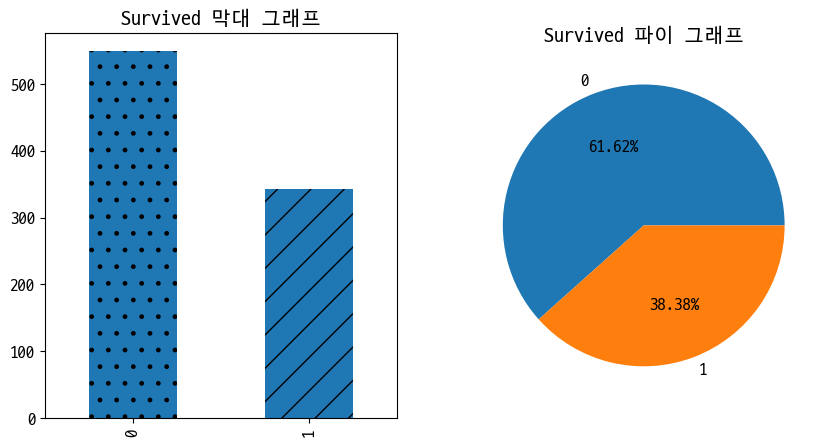

In [30]:
# 환경설정
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1,2, figsize=(10,5))

# 막대 그래프
ax[0].set_title('Survived 막대 그래프')
freq['도수'].plot.bar(ax=ax[0], hatch=['.','/'])

# 원 그래프
ax[1].set_title('Survived 파이 그래프')
ax[1].pie(freq['도수'].values, labels=freq['도수'].index,
          autopct='%.2f%%')

plt.show()

### 양적변수
- 도수분포표, 상대도수분포표

In [32]:
# 계급의 개수를 지정하여 도수분포표 생성
result1 = pd.cut(titanic['Age'], bins=5)
freq1 = pd.DataFrame(result1.value_counts()).reset_index()
freq1 = freq1.rename(columns={'index':'계급', 'Age':'도수'}).sort_values(by='계급')
print(freq1)

                 계급   도수
2    (0.34, 16.336]  100
0  (16.336, 32.252]  346
1  (32.252, 48.168]  188
3  (48.168, 64.084]   69
4    (64.084, 80.0]   11


In [33]:
# 계급의 범위를 지정하여 도수분포표 생성
result2 = pd.cut(titanic['Age'], bins=[0, 19, 39, 59, float('inf')])
freq2 = pd.DataFrame(result2.value_counts()).reset_index()
freq2 = freq2.rename(columns={'index':'계급', 'Age':'도수'}).sort_values(by='계급')
print(freq2)

             계급   도수
1   (0.0, 19.0]  164
0  (19.0, 39.0]  387
2  (39.0, 59.0]  137
3   (59.0, inf]   26
